In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import numpy

In [2]:
data = np.genfromtxt("090510.txt",usecols=(0,1,2,3,4,5),unpack=True)

data = np.array(data)

t_050315 = data[0,:]
t_050315_up = data[1,:]
t_050315_down = data[2,:]
Flux_050315 = data[3,:]
Flux_050315_up = data[4,:]
Flux_050315_down = data[5,:]

In [3]:
def linear_fit(x,m,c):
    return  c*x**(-m)

In [4]:
params, covariance = curve_fit(f = linear_fit, xdata = t_050315, ydata = Flux_050315)

print('Slope (m) is ', params[0])
print('Intercept (c) is ', params[1])
print(covariance)

Slope (m) is  0.33177028802955005
Intercept (c) is  1.7701428351567589e-10
[[2.41251089e-03 3.63158331e-12]
 [3.63158331e-12 5.57018468e-21]]


In [5]:
standarddevparams2 = np.sqrt(np.diag(covariance))
residuals = Flux_050315 - linear_fit(t_050315,params[0],params[1])
squaresumofresiduals = np.sum(residuals**2)
squaresum = np.sum((Flux_050315-np.mean(Flux_050315))**2)
R2 = 1 - (squaresumofresiduals/squaresum)

print('The value of fitting parameters with their errors')
print('The slope (m) is ', params[0],'+-', standarddevparams2[0])
print('The intercept (c) is ', params[1],'+-', standarddevparams2[1])
print('The R^2 value is ', R2)

The value of fitting parameters with their errors
The slope (m) is  0.33177028802955005 +- 0.04911731757674406
The intercept (c) is  1.7701428351567589e-10 +- 7.463366986212758e-11
The R^2 value is  0.6498004661664178


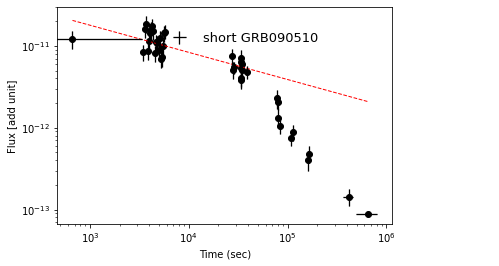

In [6]:
plt.scatter(t_050315,Flux_050315, c='k')
plt.xlabel('Time (sec)')
plt.ylabel('Flux [add unit]')
#plt.ylim(1e-12,1e-10)
#plt.xlim(80,1e3)
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.plot(t_050315, linear_fit(t_050315,params[0],params[1]),c='red',ls='--',lw=1)
plt.errorbar(t_050315, Flux_050315, xerr=t_050315_up,  yerr=Flux_050315_up, markersize=5,  mfc = 'none',  
             ecolor='k', fmt = ' ', mec='k', 
             capsize=0.1, lw=1.3,label='short GRB090510')
#plt.grid()
plt.legend(bbox_to_anchor=(0.31, .80, 0.99, .103), loc=3, ncol=1, fontsize=13, mode="expand",fancybox = True,framealpha=0.0001, borderaxespad=0.01)
plt.savefig('090510_fit.png')
plt.show();

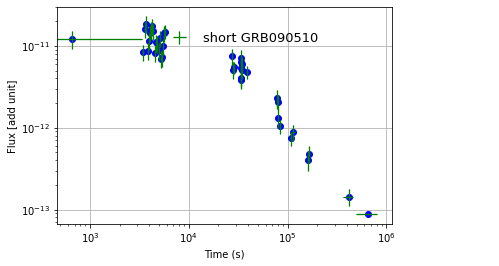

In [7]:
plt.plot(t_050315, Flux_050315, 'bo')
plt.errorbar(t_050315, Flux_050315, xerr=t_050315_up,  yerr=Flux_050315_up, markersize=5,  mfc = 'none',  
             ecolor='g', fmt = ' ', mec='g', 
             capsize=0.1, lw=1.3,label='short GRB090510')
plt.xlabel('Time (s)')
plt.ylabel('Flux [add unit]')
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.grid()
plt.legend(bbox_to_anchor=(0.31, .80, 0.99, .103), loc=3, ncol=1, fontsize=13, mode="expand",fancybox = True,framealpha=0.0001, borderaxespad=0.01)

plt.savefig('090510_err.png')
#plt.savefig('GRB180720C.pdf')
plt.show()

/tmp/ipykernel_3365/963483856.py:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "+" (-> marker='+'). The keyword argument will take precedence.
  plt.errorbar(bin_centers, yf, yerr = yf**0.5, marker = '.', fmt = '+', linewidth=2, color='k', capsize=1, alpha=.6)


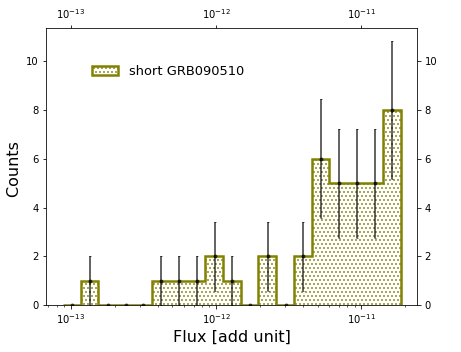

In [8]:
fig = plt.figure(1, figsize=(6.,4.5))
ax = fig.add_subplot(111)
#fig = plt.figure(1, figsize=(12.0,10.5))
fig.subplots_adjust(hspace=0.00, wspace=0.00, left=0.11, bottom=0.11, top=0.965, right=0.97)


#ax = plt.subplot2grid((3, 3), (0, 0), colspan=2)
plt.tick_params(axis='both', left='on', top='off', right='off', bottom='on', labelleft='on', labeltop='off', labelright='off', labelbottom='on')


s =20
MINf, MAXf = np.min(Flux_050315), np.max(Flux_050315)
plt.hist(Flux_050315, bins = 10**np.linspace(np.log10(MINf), np.log10(MAXf), s), color='olive', 
         lw=2.5, linestyle = '-',  histtype='step', rwidth='mid',  hatch='...', 
          edgecolor='olive',  alpha=.99, label='short GRB090510')
yf, bin_edges = numpy.histogram(Flux_050315, bins = 10**np.linspace(np.log10(MINf), np.log10(MAXf), s))
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers, yf, yerr = yf**0.5, marker = '.', fmt = '+', linewidth=2, color='k', capsize=1, alpha=.6)
plt.gca().set_xscale("log")
plt.xlabel(r'Flux [add unit]',fontsize=16,fontweight='normal')
plt.ylabel(r'Counts ',fontsize=16,fontweight='normal')
plt.legend(bbox_to_anchor=(0.11, .80, 0.99, .103), loc=3, ncol=1, fontsize=13, mode="expand",fancybox = True,framealpha=0.0001, borderaxespad=0.01)


plt.savefig('090510_hist.png')

plt.show()